<a href="https://colab.research.google.com/github/cedeerwe/brutalna-akademia/blob/master/notebooks/01_hadzanie_mincou_bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pomocný kód

Nachádza sa v ňom všeličo zaujímavé. Je napísaný poriadnejšie ako zvyčajne. V takomto stave by sa mohol kľudne použiť aj v rámci firmy.

In [0]:
from typing import List, Tuple
import graphviz
import numpy as np
import pandas as pd

Sequence = str
State = str
HEADS = "H"
TAILS = "T"

def get_states(sequence: Sequence) -> List[State]:
    return [sequence[:i] for i in range(len(sequence) + 1)]

def find_state(states: List[State], sequence: Sequence) -> State:
    if sequence in states:
        return sequence
    else:
        return find_state(states, sequence[1:])

def next_states(states: List[State], state: State) -> Tuple[State, State]:
    return (find_state(states, state + HEADS), find_state(states, state + TAILS))

def generate_graph(sequence: Sequence) -> graphviz.dot:
    states = get_states(sequence)
    dot = graphviz.Digraph()
    for state in states:
        if state != sequence:
            for next_state in next_states(states, state):
                dot.edge(state, next_state)
    dot.node(sequence, color="blue")
    return dot

def state_number(state: State) -> int:
    return len(state)

LHS = List[List[float]] # left hand sides
RHS = List[float] # right hand sides

def generate_equations(sequence: Sequence) -> Tuple[LHS, RHS]:
    states = get_states(sequence)
    lhs : List[List[float]] = []
    rhs : List[float] = []
    for state in states:
        if state != sequence:
            # equations for transitions
            equation = [0] * len(states)
            equation[state_number(state)] = 1
            for next_state in next_states(states, state):
                equation[state_number(next_state)] -= 0.5
            lhs.append(equation)
            rhs.append(1)
    
    # equation for end point - no more flips needed
    equation = [0] * len(states)
    equation[state_number(sequence)] = 1
    lhs.append(equation)
    rhs.append(0)
    return (lhs, rhs)

def show_equations(states: List[State], lhs: LHS, rhs: RHS) -> pd.DataFrame:
    data = np.c_[np.array(lhs), np.array(rhs)]
    return pd.DataFrame(data, columns = states + ["RHS"])

def solve_equations(lhs: LHS, rhs: RHS):
    return np.linalg.solve(np.array(lhs), np.array(rhs))

def generate_solutions(sequence: Sequence):
    return list(solve_equations(*generate_equations(sequence)))

def generate_graph_with_solutions(sequence: Sequence) -> graphviz.dot:
    states = get_states(sequence)
    dot = graphviz.Digraph()
    for state in states:
        if state != sequence:
            for next_state in next_states(states, state):
                dot.edge(state, next_state)
    solutions = generate_solutions(sequence)
    for (solution, state) in zip(solutions, states):
        dot.node(state, label=f"{state}\n{solution}")
    dot.node(sequence, color="blue")
    return dot


# Ukážky

In [2]:
sequence = "HHTTH"
states = get_states(sequence)
states

['', 'H', 'HH', 'HHT', 'HHTT', 'HHTTH']

In [3]:
find_state(states, 'HHT')

'HHT'

In [4]:
find_state(states, 'HTTTHTHHTH')

'H'

In [5]:
next_states(states, 'HTTTHTHHT')

('H', 'HHTT')

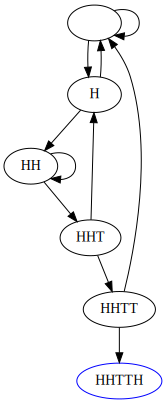

In [6]:
generate_graph(sequence)

In [7]:
generate_equations(sequence)

([[0.5, -0.5, 0, 0, 0, 0],
  [-0.5, 1, -0.5, 0, 0, 0],
  [0, 0, 0.5, -0.5, 0, 0],
  [0, -0.5, 0, 1, -0.5, 0],
  [-0.5, 0, 0, 0, 1, -0.5],
  [0, 0, 0, 0, 0, 1]],
 [1, 1, 1, 1, 1, 0])

In [8]:
lhs, rhs = generate_equations(sequence)
show_equations(states, lhs, rhs)

,,H,HH,HHT,HHTT,HHTTH,RHS
0,0.5,-0.5,0.0,0.0,0.0,0.0,1.0
1,-0.5,1.0,-0.5,0.0,0.0,0.0,1.0
2,0.0,0.0,0.5,-0.5,0.0,0.0,1.0
3,0.0,-0.5,0.0,1.0,-0.5,0.0,1.0
4,-0.5,0.0,0.0,0.0,1.0,-0.5,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
generate_solutions(sequence)

[34.0, 32.0, 28.0, 26.0, 18.0, 0.0]

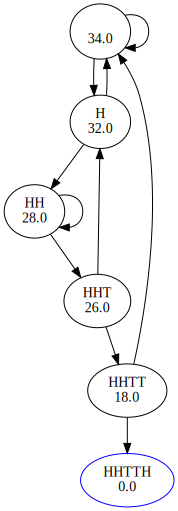

In [10]:
generate_graph_with_solutions(sequence)